In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def enlaces_aleatorios(N, p):
    for i in range(N):
        for j in range(i, N):
            if np.random.rand() < p:
                yield i,j

def red_aleatoria(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N)) # agrega todos los nodos
    G.add_edges_from( enlaces_aleatorios(N, p) ) # agrega los enlaces obedeciendo la probabilidad p
    return G            

def n_max_comp(N, p):
    G = red_aleatoria(N, p)
    M = len( max([c for c in nx.connected_components(G)] , key = len ) )
    return M

np.mean([n_max_comp(20, .1) for i in range(100)])

15.59

In [3]:
for p in np.arange(0,1, .05):
    print(round(p, 2),'\t', np.mean([n_max_comp(20, p) for i in range(100)]))

0.0 	 1.0
0.05 	 7.32
0.1 	 15.45
0.15 	 18.79
0.2 	 19.8
0.25 	 19.93
0.3 	 19.98
0.35 	 19.99
0.4 	 20.0
0.45 	 20.0
0.5 	 20.0
0.55 	 20.0
0.6 	 20.0
0.65 	 20.0
0.7 	 20.0
0.75 	 20.0
0.8 	 20.0
0.85 	 20.0
0.9 	 20.0
0.95 	 20.0


In [4]:
lista_valores10 = []
lista_valores50 = []
dominio = np.arange(0,.5, .01)
for p in dominio:
    lista_valores10.append(np.mean([n_max_comp(10, p) for i in range(50)])/10)
    lista_valores50.append(np.mean([n_max_comp(50, p) for i in range(50)])/50)

In [9]:
def fast_max_comp(N, p):
    G = nx.fast_gnp_random_graph(N, p)
    M = len( max([c for c in nx.connected_components(G)] , key = len ) )
    return M
lista_valores500=[]
for p in dominio:
    lista_valores500.append(np.mean([fast_max_comp(200,p) for i in range(50)])/500)


#### El grado promedio de red aleatoria esta dado por \< k \>=p(N-1), donde N numero de nodos de la red y p probabilidad de enlazar un par de nodos cualquiera. Basado en el modelo G(n,p)

In [5]:
grado_prom_10 = dominio * (10-1)
grado_prom_50 = dominio * (50-1)

In [6]:
len(grado_prom_50)

50

Text(0.5, 1.0, 'Evolucion de red aleatoria, n=50')

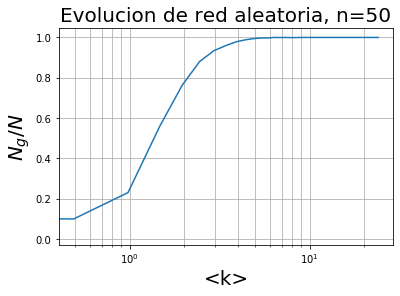

In [7]:
fig = plt.figure()
ax = plt.subplot(1,1,1)
ax.plot(grado_prom_50,lista_valores50)
ax.set_xlabel("<k>",fontsize=20)
ax.set_ylabel("$N_g/N$",fontsize=20)
ax.set_xscale('log')
plt.grid(which="both")
ax.set_title("Evolucion de red aleatoria, n=50",fontsize=20)
# plt.savefig("red_aleatoria_n=50.png")

[]

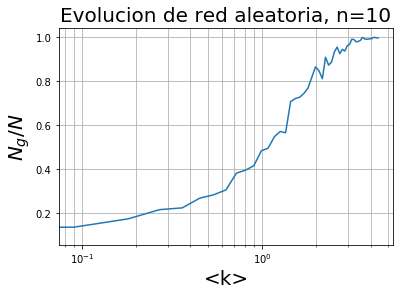

In [8]:
plt.plot(grado_prom_10, lista_valores10)
plt.xscale('log')
plt.grid(which="both")
plt.ylabel("$N_g/N$",fontsize=20)
plt.xlabel("<k>",fontsize=20)
plt.title("Evolucion de red aleatoria, n=10",fontsize=20)
plt.plot()
# plt.savefig("red_aleatoria_n=10.png")

[]

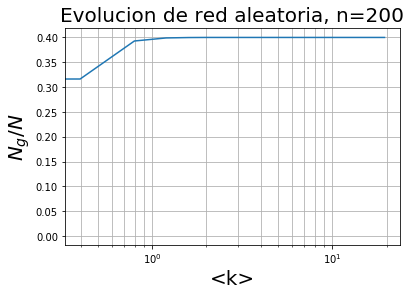

In [11]:
dominio = np.arange(0,.1, .002)
grado_prom_500 = dominio * (200-1)
plt.plot(grado_prom_500, lista_valores500)
plt.xscale('log')
plt.grid(which="both")
plt.ylabel("$N_g/N$",fontsize=20)
plt.xlabel("<k>",fontsize=20)
plt.title("Evolucion de red aleatoria, n=200",fontsize=20)
plt.plot()
# plt.savefig('evol_red_aleato_n=200')

### Distribucion de rango N=100 , N=1000 y N=10000 

In [210]:
g100 = nx.fast_gnp_random_graph(100,50/(100-1))
g1000 = nx.fast_gnp_random_graph(1000,50/(1000-1))
g10000 = nx.fast_gnp_random_graph(10000,50/(10000-1))

In [211]:
sum([grado for (_,grado) in g100.degree] )/100

49.96

In [213]:
pk100 = np.array(g100.degree)[:,1]
pk1000=np.array(g1000.degree)[:,1]
pk10000 = np.array(g10000.degree)[:,1]

In [237]:
from scipy.special import factorial
from scipy.stats import binom

In [232]:
def poisson(x,lam):
    return np.exp(-lam) * ((np.power(lam,x))/factorial(x))

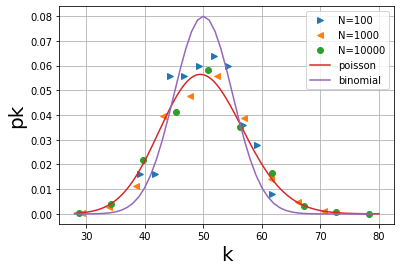

In [274]:
pk = [pk100,pk1000,pk10000]
N=[100,1000,10000]
bins = []
edges = []
bin_centres = []
for i in range(3):
    counts,bin_edges = np.histogram(pk[i],10,density=True)
    bins.append(counts)
    edges.append(bin_edges)
    bin_centres.append( (bin_edges[:-1] + bin_edges[1:])/2.)
    
x = np.linspace(28,80,1000)
plt.plot(bin_centres[0],bins[0],'>',label = 'N=100')
plt.plot(bin_centres[1],bins[1],'<',label='N=1000')
plt.plot(bin_centres[2],bins[2],'o',label="N=10000")
plt.plot(x,poisson(x,50),label="poisson")
x2 = np.arange(28,80)
p=50/(100-1)
plt.plot(x2,binom.pmf(x2,99,p),label="binomial")
plt.ylabel("pk",fontsize=20)
plt.xlabel("k",fontsize=20)
plt.legend()
plt.grid()
#plt.savefig('degree_distribution_random_netwokrs.png')